### Name: Jose Aries E. De Los Santos


### Dirichlet Kernel

Define $f$: $\mathbb{T}$ $\rightarrow$ $\mathbb{R}$

$$
f(x) =
\begin{cases}
   x +\frac{1}{2} & \text{if x} \in \left( -\frac{1}{2}, 0 \right), \\
   4x^{2} & \text{if x} \in \left[0, \frac{1}{2} \right], \\
\end{cases}
$$

Let $S_{N} f$ be the $Nth$ partial sum of the fourier series of $f$.  On one coordinate plane, superimpose the (numerical) plots of $f$, $S_{3}f$ and $S_{10}f$.

(Remark: $S_{N}f$ = $f$ $\ast$ $D_{N}$ (x), where $D_{N}$ = $\frac{sin(2N+1) \pi x}{sin \pi x}$ )

(Note: Run from the top cell)

In [1]:
#@title Modules and Libraries
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#@title Using Composite Simpson's Rule coded from Scratch
def compsimpson(f,a,b,n):
  '''
  Numerical Integration Composite Simpson's Rule
  '''
  if n % 2 != 0:
    raise ValueError("Number of subintervals (n) should be an even number.") ##Assume n is even
  h = (b-a)/n

  #For odd indices
  sum1 = 0
  for i in range(1,n,2):
    sum1 = sum1 + f(a + i*h)
  #For even indices
  sum2 = 0
  for i in range(2,n-1,2):
    sum2 = sum2 + f(a+i*h)
  return (h/3)*(f(a) + f(b) + 4*sum1 + 2*sum2)

#Define the Piecewise Function
def f(x):
    return np.where((-0.5 < x < 0) , x + 0.5, np.where((0 <= x <= 0.5), 4 * np.power(x, 2),0))

# Vectorize the function for numpy operations
fvec = np.vectorize(f)

# Define the Dirichlet kernel
def D_N(x,N):
    if x == 0:
        return (2*N + 1)
    else:
        return np.sin((2*N + 1) * np.pi * x) / np.sin(np.pi * x)

# Define the Nth partial sum S_N f using convolution
def SNf(x,N):
  DNf = lambda t: f(x-t) * D_N(t,N)
  integral_value = compsimpson(DNf, -0.5, 0.5,n=1000)
  return integral_value

# Generate points for plotting
x = np.linspace(-0.5, 0.5, 1000)
SNfvec = np.vectorize(SNf)

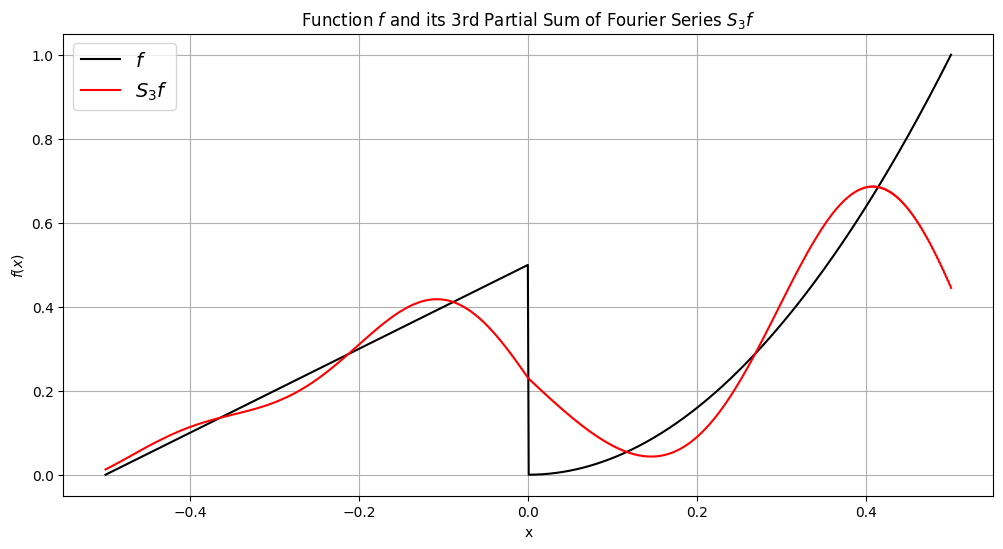

In [ ]:
#@title Plot of f and S3f
plt.figure(figsize=(12, 6))
plt.plot(x, fvec(x), label='$f$', color='#000000')
plt.plot(x, SNfvec(x,N=3), label='$S_{3}f$', color='red', linestyle='-')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title("Function $f$ and its 3rd Partial Sum of Fourier Series $S_{3}f$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


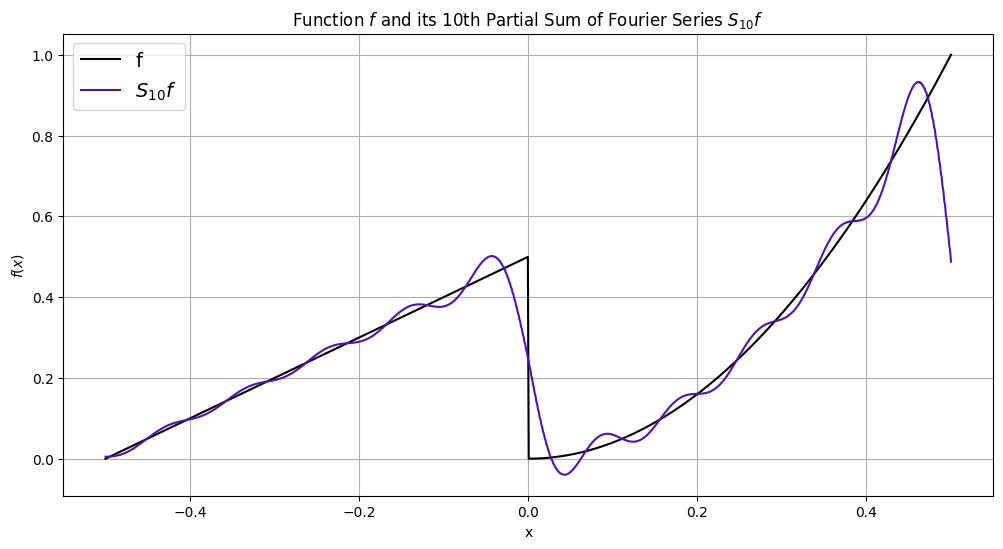

In [ ]:
#@title Plot of f and S10f
plt.figure(figsize=(12, 6))
plt.plot(x, fvec(x), label='f', color='#000000')
plt.plot(x, SNfvec(x,N=10), label='$S_{10}f$', color='#5511aa', linestyle='-')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title("Function $f$ and its 10th Partial Sum of Fourier Series $S_{10}f$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


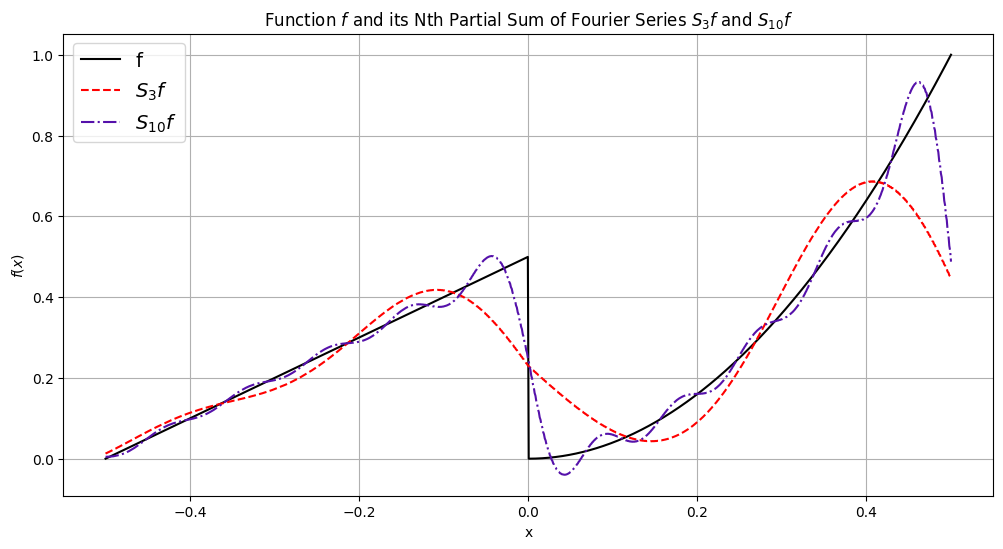

In [ ]:
#@title Plot f, S3f, S10f
plt.figure(figsize=(12, 6))
plt.plot(x, fvec(x), label='f', color='#000000')
plt.plot(x, SNfvec(x,N=3), label='$S_{3}f$', color='red', linestyle='--')
plt.plot(x, SNfvec(x,N=10), label='$S_{10}f$', color='#5511aa', linestyle='-.')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title("Function $f$ and its Nth Partial Sum of Fourier Series $S_{3}f$ and $S_{10}f$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


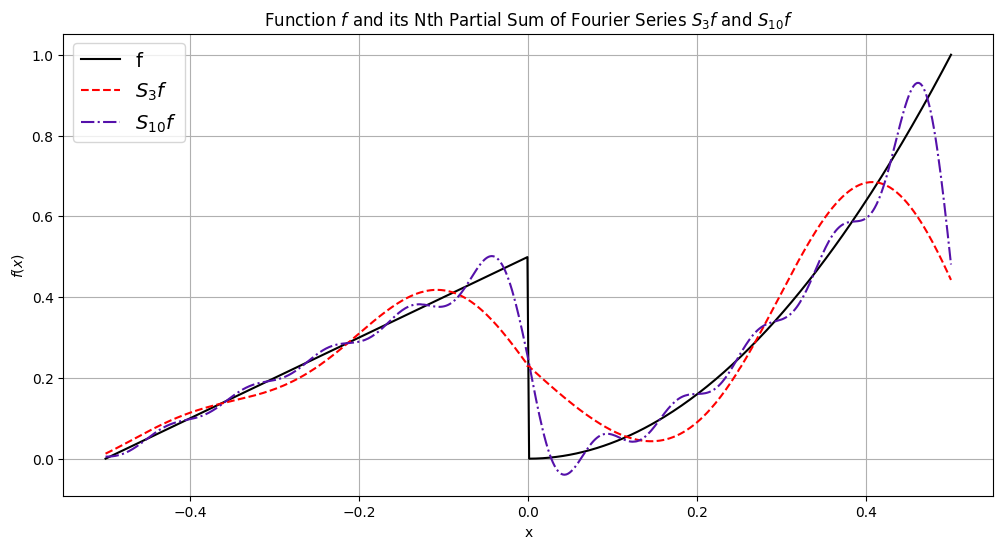

In [ ]:
#@title Using scipy.integrate.quad
import scipy.integrate
def f(x):
    return np.where((-0.5 < x < 0) , x + 0.5, np.where((0 <= x <= 0.5), 4 * np.power(x, 2),0))

# Vectorize the function for numpy operations
fvec = np.vectorize(f)

# Define the Dirichlet kernel
def D_N(x,N):
    if x == 0:
        return (2*N + 1)
    else:
        return np.sin((2*N + 1) * np.pi * x) / np.sin(np.pi * x)

# Define the Nth partial sum S_N f using convolution
def SNf(x,N):
  DNf = lambda t: f(x-t) * D_N(t,N)
  integral_value, _ = scipy.integrate.quad(DNf, -0.5, 0.5) #Using Quad from scipy.integrate
  return integral_value

# Generate points for plotting
x = np.linspace(-0.5, 0.5, 500)
SNfvec = np.vectorize(SNf)

# Plot f, S3f, S10f
plt.figure(figsize=(12, 6))
plt.plot(x, fvec(x), label='f', color='#000000')
plt.plot(x, SNfvec(x,N=3), label='$S_{3}f$', color='red', linestyle='--')
plt.plot(x, SNfvec(x,N=10), label='$S_{10}f$', color='#5511aa', linestyle='-.')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title("Function $f$ and its Nth Partial Sum of Fourier Series $S_{3}f$ and $S_{10}f$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()
